In [4]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,models

2024-05-08 17:08:14.303746: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-08 17:08:15.008605: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
df = pd.read_pickle('3Emociones.pkl')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4623 entries, 0 to 4622
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Imagen           4623 non-null   object
 1   Imagen con zoom  4623 non-null   object
 2   Hitos faciales   4623 non-null   object
 3   Etiquetas        4623 non-null   object
dtypes: object(4)
memory usage: 180.6+ KB


In [7]:
df.head()

,Imagen,Imagen con zoom,Hitos faciales,Etiquetas
0,"[[165, 166, 164, 167, 167, 166, 167, 167, 167,...","[[161, 160, 161, 161, 161, 161, 161, 160, 99, ...","[[62, 83], [62, 88], [63, 93], [63, 97], [64, ...",bored
1,"[[165, 166, 165, 166, 167, 167, 167, 167, 167,...","[[160, 161, 160, 161, 161, 162, 161, 162, 132,...","[[62, 83], [62, 88], [63, 93], [63, 97], [64, ...",bored
2,"[[165, 165, 165, 166, 167, 166, 166, 167, 167,...","[[160, 161, 161, 60, 36, 76, 88, 88, 92, 102, ...","[[63, 82], [63, 87], [63, 91], [63, 96], [65, ...",bored
3,"[[165, 166, 165, 165, 166, 167, 167, 167, 167,...","[[160, 161, 160, 45, 42, 81, 88, 88, 92, 101, ...","[[63, 83], [63, 87], [63, 92], [64, 97], [65, ...",bored
4,"[[165, 166, 166, 166, 166, 167, 166, 166, 167,...","[[160, 160, 160, 41, 43, 81, 88, 88, 92, 102, ...","[[63, 83], [63, 88], [63, 92], [64, 97], [65, ...",bored


In [9]:
print(df['Imagen con zoom'][0])

[[161 160 161 ... 130  26 169]
 [160 161 161 ...  86   8 164]
 [161 160 160 ...  41   5 108]
 ...
 [148 146 146 ... 159 159 160]
 [146 146 148 ... 159 158 160]
 [145 145 145 ... 155 157 158]]


In [10]:
import numpy as np
from PIL import Image

# Función para redimensionar una imagen
def redimensionar_imagen(imagen, nuevo_ancho, nuevo_alto):
    img = Image.fromarray(imagen)
    img = img.resize((nuevo_ancho, nuevo_alto))
    return np.array(img)

# Definir el tamaño al que quieres redimensionar todas las imágenes
nuevo_ancho = 150
nuevo_alto = 150

# Redimensionar todas las imágenes a la misma forma y convertirlas en arreglos numpy
X = np.array([redimensionar_imagen(imagen, nuevo_ancho, nuevo_alto) for imagen in df['Imagen con zoom']])


In [11]:
X = X /255.0

In [12]:
etiquetas = df['Etiquetas'].astype('category').cat.codes

In [13]:
print(etiquetas)

0       0
1       0
2       0
3       0
4       0
       ..
4618    2
4619    2
4620    2
4621    2
4622    2
Length: 4623, dtype: int8


In [14]:
# Crear un diccionario que mapee los códigos a las etiquetas originales
diccionario_etiquetas = dict(enumerate(df['Etiquetas'].astype('category').cat.categories))

# Recuperar las etiquetas originales a partir de los códigos
etiquetas_originales = etiquetas.map(diccionario_etiquetas)

# Ahora puedes ver las etiquetas originales
print(etiquetas_originales)

0         bored
1         bored
2         bored
3         bored
4         bored
         ...   
4618    excited
4619    excited
4620    excited
4621    excited
4622    excited
Length: 4623, dtype: object


In [15]:
#Dividir datos de entrenamiento y validacion

X_train, X_test, y_train, y_test = train_test_split(X, etiquetas, test_size=0.3, random_state=42)


In [16]:
# Definir el modelo CNN
model = models.Sequential([
    layers.Conv2D(256, (3, 3), activation='relu', input_shape=(nuevo_ancho, nuevo_alto, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(etiquetas), activation='softmax')
])

/home/waldos/.local/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-08 17:08:59.000941: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-08 17:08:59.037057: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/s

In [17]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 85:
            print("\nReached 85% accuracy so cancelling training!")
            self.model.stop_training = True
            
back = myCallback() 

In [18]:
#compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test),callbacks=[back])

Epoch 1/25


I0000 00:00:1715213348.824008   20369 service.cc:145] XLA service 0x7f93ac005620 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715213348.824052   20369 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti with Max-Q Design, Compute Capability 7.5
2024-05-08 17:09:08.857183: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-08 17:09:08.991791: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
2024-05-08 17:09:09.707314: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.05GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-05-08 17:09:10.908788: W external/local_tsl/tsl/framework/bfc

  2/102 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.1172 - loss: 8.4038 

I0000 00:00:1715213356.373380   20369 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


101/102 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.3803 - loss: 2.5190

2024-05-08 17:09:25.495180: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.21GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-05-08 17:09:25.904504: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.14GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-05-08 17:09:25.904541: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.14GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-05-08 17:09:26.303281: W external/local_tsl/tsl/framework/bfc_

102/102 ━━━━━━━━━━━━━━━━━━━━ 23s 139ms/step - accuracy: 0.3819 - loss: 2.4972 - val_accuracy: 0.4585 - val_loss: 0.9589
Epoch 2/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.5458 - loss: 0.8742 - val_accuracy: 0.6900 - val_loss: 0.6228
Epoch 3/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.6706 - loss: 0.6256 - val_accuracy: 0.7231 - val_loss: 0.5838
Epoch 4/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.7129 - loss: 0.6036 - val_accuracy: 0.7376 - val_loss: 0.5529
Epoch 5/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.7552 - loss: 0.5233 - val_accuracy: 0.7253 - val_loss: 0.5632
Epoch 6/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.7529 - loss: 0.5195 - val_accuracy: 0.7145 - val_loss: 0.6066
Epoch 7/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.7418 - loss: 0.5282 - val_accuracy: 0.7138 - val_loss: 0.5809
Epoch 8/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.7542 - loss: 0.5283 - val_accura

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calcular la precisión del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Precisión del modelo en el conjunto de prueba:", test_accuracy)

# Generar la matriz de confusión
y_pred = model.predict(X_test)
confusion_mat = confusion_matrix(y_test, np.argmax(y_pred, axis=1))

print("Matriz de confusión:")
print(confusion_mat)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7344 - loss: 1.2988
Precisión del modelo en el conjunto de prueba: 0.7404469847679138
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step
Matriz de confusión:
[[281  15  10]
 [ 10 421 182]
 [ 15 127 326]]


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


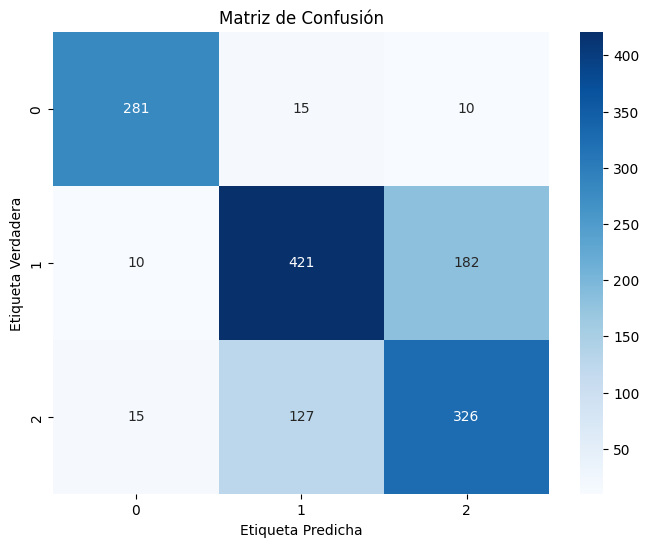

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generar la matriz de confusión
y_pred = model.predict(X_test)
confusion_mat = confusion_matrix(y_test, np.argmax(y_pred, axis=1))

# Plotear la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()


In [ ]:
import numpy as np
from PIL import Image

# Cargar y preprocesar la imagen
def cargar_y_preprocesar_imagen(ruta_imagen, nuevo_ancho, nuevo_alto):
    imagen = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises si es necesario
    imagen = imagen.resize((nuevo_ancho, nuevo_alto))
    imagen_array = np.array(imagen)
    imagen_array = np.expand_dims(imagen_array, axis=0)  # Agregar una dimensión de lote
    imagen_array = np.expand_dims(imagen_array, axis=3)  # Agregar una dimensión de canal (para escala de grises)
    return imagen_array

# Definir la ruta de la imagen a predecir
ruta_imagen = '62.jpg'

# Cargar y preprocesar la imagen
imagen_array = cargar_y_preprocesar_imagen(ruta_imagen, 150, 150)

# Realizar la predicción
prediccion = model.predict(imagen_array)

# Obtener la clase predicha
clase_predicha = np.argmax(prediccion)

# Imprimir la clase predicha
clases = ['Bored','Engaged' ,'Excited']
print("Clase predicha:", clases[clase_predicha])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
Clase predicha: 2


In [ ]:
model.save('modeloCNN4.h5')